**Import libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

**CSV file USER_PASSWORD**

In [ ]:
input_file = 'users.csv.xls'
output_file = 'user_pw.csv'

data = pd.read_csv(input_file, delimiter=',')
data.columns = ['id', 'user_name', 'password']
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

data.to_csv(output_file, index=False)

/var/folders/rt/r98xkfj17y3d96qp_lptv2700000gn/T/ipykernel_60365/669577879.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


**Files paths**

In [ ]:
user_file = "user_pw.csv"
common_passwords_file = "top10mln_pw.txt"
common_words_file = "google_10000_eng.txt"

users = pd.read_csv(user_file)

with open(common_passwords_file, "r") as f:
    common_passwords = set(f.read().splitlines())

with open(common_words_file, "r") as f:
    common_words = set(f.read().splitlines())

**Password analysis**

In [38]:
#Weak passwords
users['is_weak'] = users['password'].isin(common_passwords)
num_weak_passwords = users['is_weak'].sum()
print(f"Number of weak passwords: {num_weak_passwords} out of {len(users)} users")

#Password length
users['password_length'] = users['password'].str.len()
min_length = users['password_length'].min()
max_length = users['password_length'].max()
average_length = users['password_length'].mean()
print(f"Minimum length: {min_length}, maximum length: {max_length}, average length: {average_length:.2f}")

#Comparing with common words
users['is_common_word'] = users['password'].isin(common_words)
num_common_word_passwords = users['is_common_word'].sum()
print(f"Number of passwords that match common Google search words: {num_common_word_passwords}")

#Content patterns and frequencies
users['contains_only_letters'] = users['password'].str.isalpha()
users['contains_only_numbers'] = users['password'].str.isdigit()
users['contains_mixed'] = ~users['contains_only_letters'] & ~users['contains_only_numbers']

only_letters = users['contains_only_letters'].sum()
only_numbers = users['contains_only_numbers'].sum()
mixed = users['contains_mixed'].sum()

print(f"Passwords containing only letters: {only_letters}")
print(f"Passwords containing only numbers: {only_numbers}")
print(f"Passwords with mixed characters: {mixed}")

#Password strength classification
def classify_password(row):
    if row['is_weak']:
        return "Weak"
    elif row['contains_only_letters'] or row['contains_only_numbers']:
        return "Medium"
    else:
        return "Strong"

#Special characters
special_characters = set(string.punctuation)
users['contains_special_char'] = users['password'].apply(lambda x: any(c in special_characters for c in x))

#Uppercase letters
users['contains_uppercase'] = users['password'].apply(lambda x: any(c.isupper() for c in x))

#Repetition frequency
password_frequency = users['password'].value_counts()
users['password_repetition'] = users['password'].map(password_frequency)

#Final password strength classification
users['password_strength'] = users.apply(classify_password, axis=1)

Number of weak passwords: 129 out of 982 users
Minimum length: 1, maximum length: 22, average length: 8.71
Number of passwords that match common Google search words: 136
Passwords containing only letters: 385
Passwords containing only numbers: 103
Passwords with mixed characters: 494


**Final dataset**

In [6]:
users.to_csv("user_pw_analysis.csv", index=False)

**GRAPH ANALYSIS**

**Import dataset**

In [ ]:
df = pd.read_csv('user_pw_analysis.csv')
df = df.drop(columns=['user_name', 'id'])

**WordCloud common words**

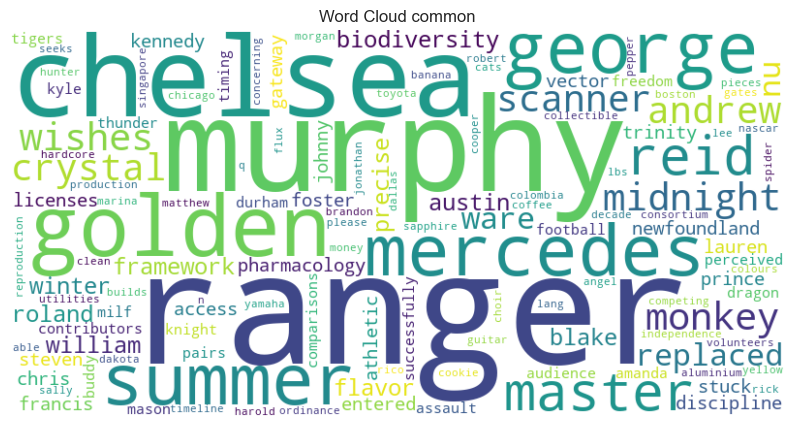

In [ ]:
common_passwords = df[df['is_common_word'] == True]['password']
common_text = " ".join(common_passwords)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(common_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud common words")
plt.show()

**Heathmap**

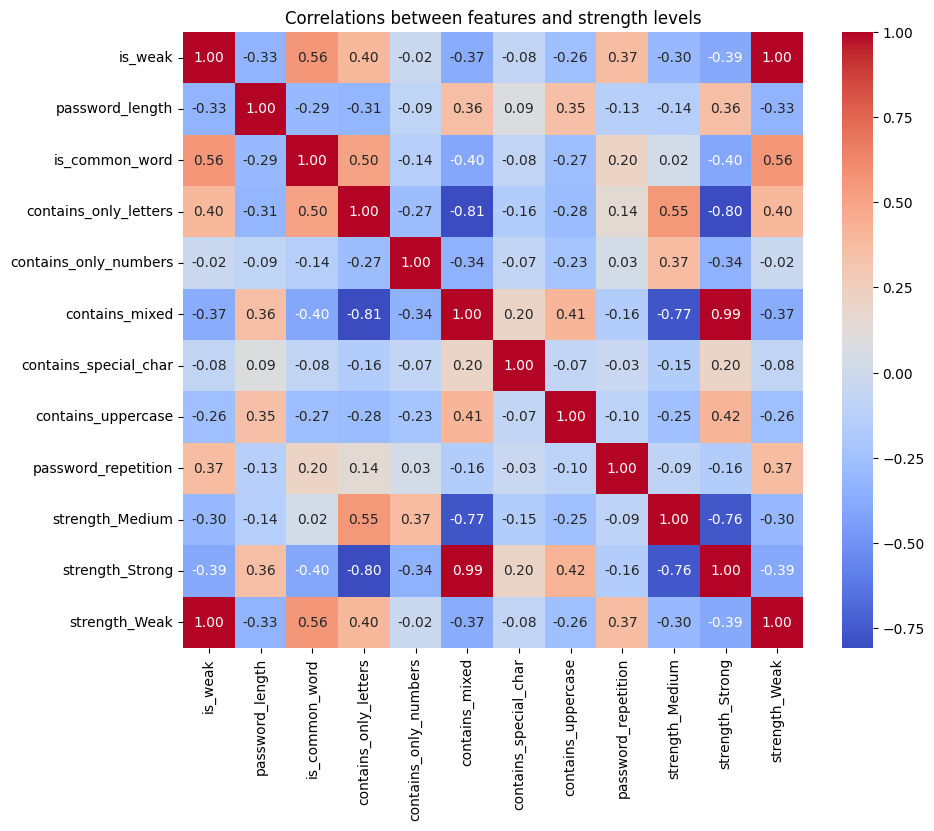

In [37]:
plt.figure(figsize=(10, 8))
strength_dummies = pd.get_dummies(df['password_strength'], prefix='strength')
correlation_data = pd.concat([df.drop(columns=['password', 'password_strength']), strength_dummies], axis=1)
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlations between features and strength levels')
plt.show()

**Boxplot lenght and strenght**

/var/folders/rt/r98xkfj17y3d96qp_lptv2700000gn/T/ipykernel_60456/2111472242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='password_strength', y='password_length', data=df, palette='pastel')


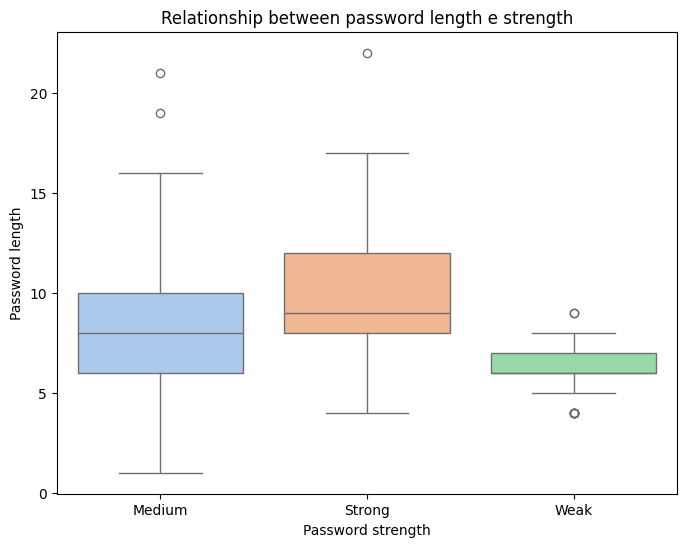

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='password_strength', y='password_length', data=df, palette='pastel')
plt.title('Relationship between password length and strength')
plt.xlabel('Password strength')
plt.ylabel('Password length')
plt.show()

**Distribution of password features by strength**

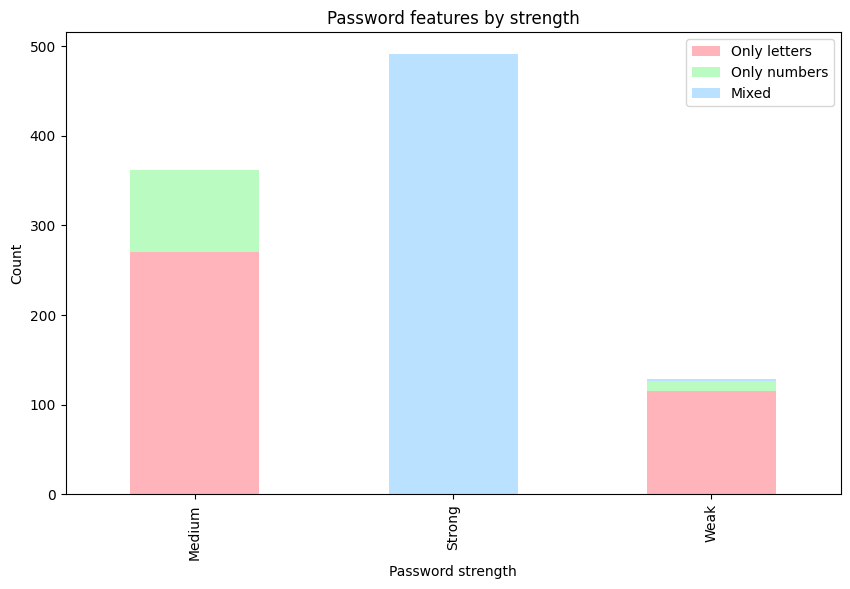

In [ ]:
strength_vs_features = df.groupby('password_strength')[['contains_only_letters', 'contains_only_numbers', 'contains_mixed']].sum()
strength_vs_features.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FFB3BA', '#B9FBC0', '#BAE1FF'])
plt.title('Password features by strength')
plt.xlabel('Password strength')
plt.ylabel('Count')
plt.legend(['Only letters', 'Only numbers', 'Mixed'])
plt.show()